In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
salaries_data = pd.read_csv("Salary_Dataset_with_Extra_Features.csv")

In [55]:
# Reading the data
salaries_data.head()

,Rating,Company Name,Job,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary(Dollars)
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,10000.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3000.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,6000.0


In [6]:
# Summary
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
# Summary stats
salaries_data.describe(include="all")

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
count,22770.000000,22770,22770,2.277000e+04,22770.000000,22770,22770,22770
unique,NaN,11261,1080,NaN,NaN,10,4,11
top,NaN,Tata Consultancy Services,Software Development Engineer,NaN,NaN,Bangalore,Full Time,SDE
freq,NaN,271,2351,NaN,NaN,8264,20083,8183
mean,3.918213,NaN,NaN,6.953872e+05,1.855775,NaN,NaN,NaN
std,0.519675,NaN,NaN,8.843990e+05,6.823668,NaN,NaN,NaN
min,1.000000,NaN,NaN,2.112000e+03,1.000000,NaN,NaN,NaN
25%,3.700000,NaN,NaN,3.000000e+05,1.000000,NaN,NaN,NaN
50%,3.900000,NaN,NaN,5.000000e+05,1.000000,NaN,NaN,NaN
75%,4.200000,NaN,NaN,9.000000e+05,1.000000,NaN,NaN,NaN


In [11]:
# Add a column(salary in dollars)
salaries_data["Salary(Dollars)"] = salaries_data.Salary * 0.01

In [13]:
salaries_data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary(Dollars)
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,10000.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3000.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,6000.0


In [60]:
# Jobs with the most people
jobs_people = salaries_data["Job"].value_counts()

print(jobs_people)

Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Java Andriod Developer                    1
Java Deceloper                            1
Java/J2EE Programmer                      1
Java SOA Developer                        1
Associate Web Developer                   1
Name: Job, Length: 1080, dtype: int64


In [61]:
salaries_data.head()

,Rating,Company Name,Job,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary(Dollars)
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4000.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,10000.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3000.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,6000.0


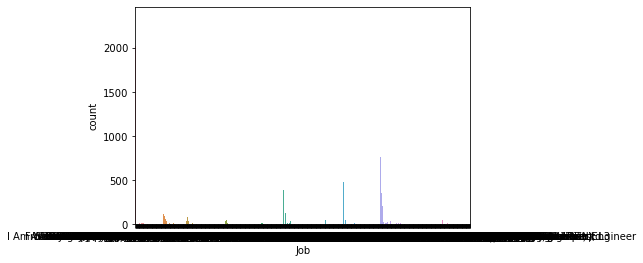

In [66]:
# Visualizing the jobs
sns.countplot(x="Job", data = salaries_data)
plt.show()
plt.close()

In [82]:
# Employment status
employment = salaries_data["Employment Status"].value_counts()
employment

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

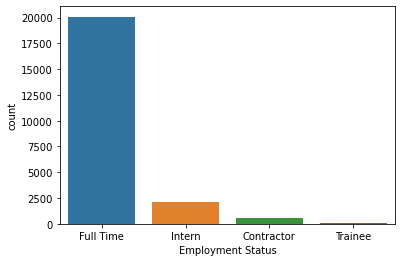

In [84]:
# Visualize this data
sns.countplot(x="Employment Status", data=salaries_data)
plt.show()
plt.close()

In [86]:
# Unique job roles
job_roles = salaries_data["Job Roles"].unique()
job_roles

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [88]:
# Value counts for job roles
job_roles_count = salaries_data["Job Roles"].value_counts()
job_roles_count

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

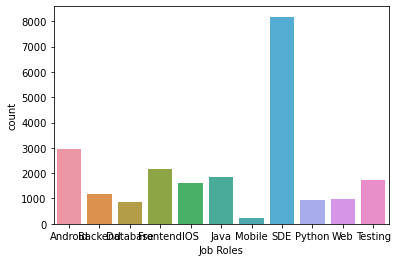

In [89]:
# Visualize data
sns.countplot(x="Job Roles", data = salaries_data)
plt.show()
plt.close()